# Topographic analysis of Teton Range, Wyoming

The objective of this tutorial is to present the process of analysis shown in the [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860) section 4.1. We will reproduce all relevant results by the following steps. 

This tutorial starts from installing Python and PyOSP on your computer. However, if you are familiar with the installing process, please jump into the section of downloading the dataset.

## Install PyOSP
We start from installing Python on your machine. Because PyOSP is installed through Conda environment, we recommend users install Python through conda environment as well. Firstly, click the link below and download the latest version of Miniconda based on your OS.

https://docs.conda.io/en/latest/miniconda.html

After installing the Miniconde, user should be able to see the Anaconda prompt in the terminal. For example, if Windows is the using OS, searching and clicking the "Anaconda prompt" in the searching bar, it should open a terminal window such as:

<img alt="conda_terminar" src="https://i.imgur.com/idb8ImV.png" height="250"/>

Now, we create a conda environment called *env_pyosp*, and install *PyOSP* in it. Entering following commends line by line:

```
conda create -n env_pyosp
conda activate env_pyosp
conda config --env --add channels conda-forge
conda config --env --set channel_priority strict
conda install python=3 pyosp
```

After PyOSP installed, we can verify the installation by entering a *Python* shell (type python in the terminal window), and then check:


In [1]:
import pyosp
print(pyosp.__version__)

0.1.6


Quit the Python shell by pressing Ctrl-Z and then Enter.

We also recommend install *Jupyter Notebook* for the analysis, run the commend below in the terminal:

`conda install jupyterlab`

After you have installed the Jupyter Notebook on your computer, you can start the notebook server by running:

`jupyter notebook`

When the notebook opens in your browser, you will see the highest level directory containing notebooks. Now we can create a new folder (from the *new* button on the top right of page) for our analysis, rename it as 'pyosp_teton', and then enter the new folder. In the new folder, you can click the *new* button again, select *Python 3*, it will open a new notebook, such as below:

<img alt="conda_terminar" src="https://i.imgur.com/L7wHG1G.png" height="250"/>

By entering the notebook, we can start our analysis.

## Download the datasets
First, you will need to download the GeoRaster and baseline shapefile for the swath analysis. In the terminal, *cd* to the folder 'pyosp_teton' that we created above, and input:

`git clone https://github.com/PyOSP-devs/pyosp-case-studies.git`

It will download datasets for this analysis.

## Basic swath analysis
In the jupyter notebook, input code snippet below: 

In [3]:
import pyosp

baseline = './pyosp-case-studies/teton/baseline.shp'
raster = './pyosp-case-studies/teton/teton_dem.tif'

orig = pyosp.Orig_curv(
    baseline, 
    raster, 
    width=100000,
    line_stepsize=1000, 
    cross_stepsize=10
)

Processing: [#########################] 68 of 68 lineSteps

After the processing bar went through the end, a swath object *orig* should be generated. Before we move to the swath results, let's take a look at baseline swath polygon, and swath polyline objects.

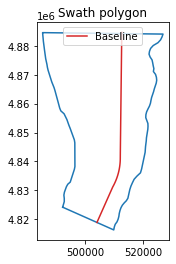

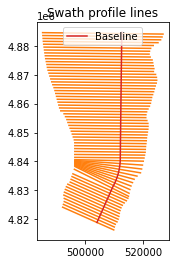

In [4]:
import matplotlib.pyplot as plt
from pyosp import read_shape

# read the baseline shape
line_shape = read_shape(baseline)
lx, ly = line_shape.xy

# Plot the swath polygon
fig, ax = plt.subplots()
swath_polygon = orig.out_polygon()
px, py = swath_polygon.exterior.xy
ax.plot(px, py)
ax.plot(lx, ly, color='C3', label="Baseline")
ax.set_aspect('equal', adjustable='box')
ax.set_title("Swath polygon")
ax.legend()

# Plot the swath profile lines
fig, ax = plt.subplots()
swath_polylines = orig.out_polylines()
for line in swath_polylines:
    x, y = line.xy
    ax.plot(x, y, color='C1')

ax.plot(lx, ly, color='C3', label="Baseline")
ax.set_aspect('equal', adjustable='box')
ax.set_title("Swath profile lines")
ax.legend()

As shown above, our sampling profile lines are bounded by the swath polygon rather than defined swath width 100,000. Because in this case, we used a customized shape associating with the structure of Teton Range to clip the DEM. And our objective is to characterize Teton Range within the structure area. Thus, we used an over-extended swath width 100,000 to ensure the profile line can reach the raster boundary. When PyOSP detected the data boundary of DEM, it will prevent the profile line extending to the nodata region. The resulted sampling data is exactly within the area of clip shape. Check the background information in the PyOSP paper [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860).
 



To plot the swath profile, simply run the method:

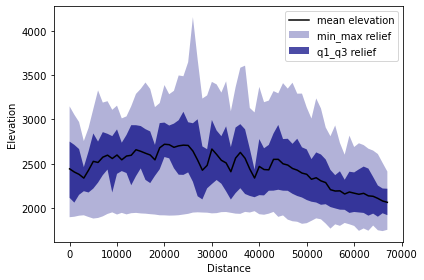

In [30]:
orig.profile_plot()

## Differential swath analysis

In the paper, we show the ability of PyOSP to split swath results, which we term “differential swaths.” We used TPI = 0 during post-processing as a threshold to delineate the inflection of slope
shape where topography changes from concave-down (TPI > 0) to convex up (TPI < 0). Thus, differential swaths enable the separation of topography via geomorphic processes, with positive and negative TPI
representing erosional and depositional areas of the topography, respectively.

We plot reclassfied TPI>0 and TPI<0 swath profiles as below. 

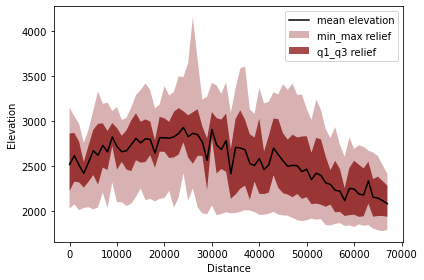

In [32]:
tpi_big = orig.post_tpi(radius=1000, min_val=0, color='maroon', swath_plot=True)

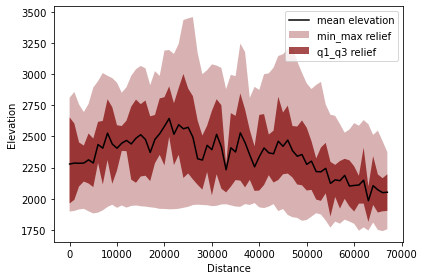

In [33]:
tpi_small = orig.post_tpi(radius=1000, max_val=0, color='maroon', swath_plot=True)

Variables `tpi_big` and `tpi_small` contain the distance and values of reclassified data. 

check details in: https://pyosp.readthedocs.io/en/latest/pyosp.curvsp.html#pyosp.curvsp.Base_curv.post_tpi

In [34]:
tpi_big

[array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
        16000., 17000., 18000., 19000., 20000., 21000., 22000., 23000.,
        24000., 25000., 26000., 27000., 28000., 29000., 30000., 31000.,
        32000., 33000., 34000., 35000., 36000., 37000., 38000., 39000.,
        40000., 41000., 42000., 43000., 44000., 45000., 46000., 47000.,
        48000., 49000., 50000., 51000., 52000., 53000., 54000., 55000.,
        56000., 57000., 58000., 59000., 60000., 61000., 62000., 63000.,
        64000., 65000., 66000., 67000.]),
 [[nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan

## Cross swath profile
Next, we evaluate five cross swath profiles along the striking of the baseline. There are two ways to define the boundary of cross swath profile:

1. Specify the start and end points distance away from the starting point of baseline.
2. Draw the points along the baseline, and then pass the shapefile of points to the function. 

In the documentation of PyOSP, there is a tutorial about application process of these two methods.

https://pyosp.readthedocs.io/en/latest/notebooks/cross_swath.html

Here, we use distance to define the cross boundary.

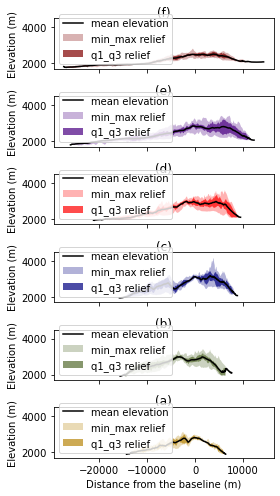

In [7]:
cases = [[58250, None], [42500, 58250], [30000, 42500],
          [22000, 30000], [5000, 22000], [0, 5000]]
colors = ['maroon', 'indigo', 'red', 'navy', 'darkolivegreen',
          'darkgoldenrod']
titles = ['(f)', '(e)', '(d)', '(c)',  '(b)', '(a)']

fig, ax = plt.subplots(6, 1, sharex=True, figsize=(4, 7))
fig.subplots_adjust(hspace=0.2)

for i in cases:
    ind = cases.index(i)
    orig.cross_plot(start=i[0], end=i[1], ax=ax[ind], color=colors[ind])

    ax[ind].set_title(titles[ind], pad=2)
    ax[ind].set_xlabel("")
    ax[ind].set_ylabel("Elevation (m)")
    ax[ind].set_xticks([-20000, -10000, 0, 10000])
    ax[ind].set_ylim(1700,4500)

    if ind == len(cases)-1:
        ax[ind].set_xlabel('Distance from the baseline (m)')

plt.tight_layout() 

## Summary

This tutorial introduces the swath analysis of Teton range by PyOSP, which corresponds to section 4.1 of [PyOSP paper](https://www.sciencedirect.com/science/article/abs/pii/S0169555X21001860). In the next tutorial, we will use PyOSP to correlate river terraces exemplified by Licking River, Kentucky.

If you have any further questions, you can open an issue at https://github.com/PyOSP-devs/PyOSP, or send email to yichuan211@gmail.com